# **BÀI TẬP TỔNG HỢP**

*Phân tích các dữ liệu quan sát được để trả lời câu hỏi: "Việc bà mẹ hút thuốc khi mang thai có ảnh hưởng đến cân nặng của trẻ sơ sinh hay không?"*


In [389]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [390]:
#Đọc dữ liệu từ file
df = pd.read_csv('babies.txt',  delim_whitespace=True)
    #Trong file csv, dữ liệu chỉ được phân cách bằng khoảng trắng
    #delim_whitespace=True chỉ ra rằng dữ liệu được phân tách bằng khoảng trắng

C:\Users\Admin\AppData\Local\Temp\ipykernel_340\4248519244.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('babies.txt',  delim_whitespace=True)


In [391]:
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


## Phần 1: Mô tả dữ liệu bằng các trị số

1. **Bước 1:** Tính các đại lượng thống kê cho hai tập dữ liệu

In [392]:
# Tách dữ liệu thành hai nhóm: mẹ hút thuốc và mẹ không hút thuốc
group1 = df[df['smoke'] == 1]['bwt'] 
   #Lấy các giá trị bwt của những bà mẹ hút thuốc (smoke == 1) và lưu vào group1 
group2 = df[df['smoke'] == 0]['bwt']
    #Lấy các giá trị bwt của những bà mẹ không hút thuốc (smoke == 0) và lưu vào group2


In [393]:
# Hàm tính toán các giá trị thống kê
def calculate_statistics(group):
    return {
        'Số lượng': len(group), #len: tính sổ lượng phần tử trong nhóm
        'Min': np.min(group), #Lấy giá trị nhỏ nhất
        'Max': np.max(group), #Lấy giá trị lớn nhất
        'Mean': np.mean(group), #Tính giá trị trung bình
        'Sd': np.std(group, ddof=1), #Độ lệch chuẩn (ddof=1 để sử dụng tính toán độ mẫu dữ liệu ước lượng)
        'Var': np.var(group, ddof=1), #var: tính phương sai (mặc định ddof=0: tính toán toàn bộ tập dữ liệu)
        'Median': np.median(group), #median: tính trung vị
        # Quantile: chia dữ liệu thành các phần
        'Quantile 0%': np.quantile(group, 0), #Giá trị nhỏ nhất trong tập dữ liệu.
        'Quantile 25%': np.quantile(group, 0.25), #Giá trị mà dưới đó có 25% dữ liệu
        'Quantile 50%': np.quantile(group, 0.5), #Giá trị trung vị, tại đó 50% dữ liệu nằm dưới và 50% nằm trên
        'Quantile 75%': np.quantile(group, 0.75), #Giá trị tại vị trí mà 75% dữ liệu nằm dưới nó
        'Quantile 100%': np.quantile(group, 1), #Giá trị lớn nhất trong tập dữ liệu
        'IQR': np.quantile(group, 0.75) - np.quantile(group, 0.25), # Tính giữa của dữ liệu, sự phân tán
        'Skewness': skew(group), #Tính độ lệch skewness
        'Kurtosis': kurtosis(group) # Tính độ nhọn
    }

In [394]:
# Tính toán các giá trị thống kê cho mỗi nhóm
stats_group1 = calculate_statistics(group1)
stats_group2 = calculate_statistics(group2)

In [395]:
# Tạo DataFrame để hiển thị kết quả
results = pd.DataFrame([stats_group1, stats_group2], index=['TH1: Bà mẹ hút thuốc', 'TH2: Bà mẹ không hút thuốc'])

In [396]:
#Hiển thị kết quả thống kê
results

,Số lượng,Min,Max,Mean,Sd,Var,Median,Quantile 0%,Quantile 25%,Quantile 50%,Quantile 75%,Quantile 100%,IQR,Skewness,Kurtosis
TH1: Bà mẹ hút thuốc,484,58,163,114.109504,18.098946,327.571835,115.0,58,102.0,115.0,126.0,163,24.0,-0.033595,-0.011968
TH2: Bà mẹ không hút thuốc,742,55,176,123.047170,17.398689,302.714371,123.0,55,113.0,123.0,134.0,176,21.0,-0.186984,1.037060


**2. Bước 2:** Phân tích dữ liệu dự trên các đại lượng vừa tính

In [397]:
# Phân tích dữ liệu của nhóm mẹ hút thuốc
stats_smoke = results.loc['TH1: Bà mẹ hút thuốc']
    # Lấy ra hàng 'TH1: Bà mẹ hút thuốc' từ results và lưu trữ vào biến stats_smoke
    # stats_smoke: chứa các giá trị thống kê đã tính toán trước đó cho nhóm mẹ hút thuốc

# Tính range
range_value = stats_smoke['Max'] - stats_smoke['Min']
    # range_value: khoảng cách giữa giá trị lớn nhất và nhỏ nhất trong dữ liệu

# Tính IQR
iqr = stats_smoke['Quantile 75%'] - stats_smoke['Quantile 25%']

# In kết quả phân tích dữ liệu
print("PHÂN TÍCH DỮ LIỆU CỦA NHÓM MẸ HÚT THUỐC: ")
print(f"1. Vị trí tập trung của dữ liệu: khoảng giá trị {stats_smoke['Mean']}-{stats_smoke['Median']}")
print("2. Tính biến động của dữ liệu:")
print(f"   - Phương sai (variance): var = {stats_smoke['Var']}")
print(f"   - Độ lệch chuẩn (standard deviation): sd = {stats_smoke['Sd']}")
print(f"   - Khoảng giá trị (range): min = {stats_smoke['Min']}, max = {stats_smoke['Max']} → range = {range_value}")
print(f"   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = {stats_smoke['Quantile 75%']}-{stats_smoke['Quantile 25%']} = {iqr}")
print("3. Hình dạng phân bố của dữ liệu:")
print(f"   - Độ lệch (Skewness): skewness = {stats_smoke['Skewness']}")
print(f"   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = {stats_smoke['Kurtosis']}")

PHÂN TÍCH DỮ LIỆU CỦA NHÓM MẸ HÚT THUỐC: 
1. Vị trí tập trung của dữ liệu: khoảng giá trị 114.10950413223141-115.0
2. Tính biến động của dữ liệu:
   - Phương sai (variance): var = 327.57183495029346
   - Độ lệch chuẩn (standard deviation): sd = 18.09894568615237
   - Khoảng giá trị (range): min = 58.0, max = 163.0 → range = 105.0
   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = 126.0-102.0 = 24.0
3. Hình dạng phân bố của dữ liệu:
   - Độ lệch (Skewness): skewness = -0.03359497605204854
   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = -0.011967521206595944


*Nhận xét:*  
*- Khoảng giá trị: Dữ liệu tập trung quanh 114 đến 115. Giá trị trung bình của nhóm mẹ hút thuốc nằm trong khoảng đó.*  
*- Tính biến động của dữ liệu: Dữ liệu phân bố gần nhau*  
*- Hình dạng phân bố của dữ liệu:*  
*   *Độ lệch: Dữ liệu hơi lệch về phía trái.*  
*   *Độ bè nhọn của đỉnh dữ liệu: Đỉnh dữ liệu nhọn, hai bên giảm với tốc độ vừa phải*

In [398]:
# Phân tích dữ liệu của nhóm mẹ không hút thuốc
stats_nonsmoke = results.loc['TH2: Bà mẹ không hút thuốc']

# Tính range
range_value = stats_nonsmoke['Max'] - stats_nonsmoke['Min']

# Tính IQR
iqr = stats_nonsmoke['Quantile 75%'] - stats_nonsmoke['Quantile 25%']

# In kết quả phân tích dữ liệu
print("PHÂN TÍCH DỮ LIỆU CỦA NHÓM MẸ KHÔNG HÚT THUỐC:")
print(f"1. Vị trí tập trung của dữ liệu: khoảng giá trị {stats_nonsmoke['Mean']}-{stats_nonsmoke['Median']}")
print("2. Tính biến động của dữ liệu:")
print(f"   - Phương sai (variance): var = {stats_nonsmoke['Var']}")
print(f"   - Độ lệch chuẩn (standard deviation): sd = {stats_nonsmoke['Sd']}")
print(f"   - Khoảng giá trị (range): min = {stats_nonsmoke['Min']}, max = {stats_nonsmoke['Max']} → range = {range_value}")
print(f"   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = {stats_nonsmoke['Quantile 75%']}-{stats_nonsmoke['Quantile 25%']} = {iqr}")
print("3. Hình dạng phân bố của dữ liệu:")
print(f"   - Độ lệch (Skewness): skewness = {stats_nonsmoke['Skewness']}")
print(f"   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = {stats_nonsmoke['Kurtosis']}")

PHÂN TÍCH DỮ LIỆU CỦA NHÓM MẸ KHÔNG HÚT THUỐC:
1. Vị trí tập trung của dữ liệu: khoảng giá trị 123.04716981132076-123.0
2. Tính biến động của dữ liệu:
   - Phương sai (variance): var = 302.7143711964963
   - Độ lệch chuẩn (standard deviation): sd = 17.39868877808027
   - Khoảng giá trị (range): min = 55.0, max = 176.0 → range = 121.0
   - Khoảng cách giữa 2 phần tư vị (IQR): Q3-Q1 = 134.0-113.0 = 21.0
3. Hình dạng phân bố của dữ liệu:
   - Độ lệch (Skewness): skewness = -0.18698408606617228
   - Độ bè nhọn của đỉnh dữ liệu (Kurtosis): kurtosis = 1.0370603124338222


*Nhận xét:*  
*- Khoảng giá trị: Dữ liệu tập trung quanh giá trị trung bình khoảng 123.0. Giá trị trung bình của nhóm mẹ không hút thuốc nằm trong khoảng đó.*  
*- Tính biến động của dữ liệu:*  
-   *Phương sai và độ lệch chuẩn cao: dữ liệu có sự biến động*
-   *Khoảng giá trị rộng lớn: có dữ khác biệt lớn giữa giá trị nhỏ nhất và giá trị lớn nhất*
-   *IQR: sự biến động của dữ liệu tập trung chủ yếu trong khoảng 21.0*  

*- Hình dạng phân bố của dữ liệu:*  
-   *Độ lệch: Dữ liệu hơi lệch về phía trái, tức là có nhiều giá trị lớn hơn so với giá trị trung bình một chút*  
-   *Độ bè nhọn của đỉnh dữ liệu: Kurtosis dương- dữ liệu có đỉnh hơi nhọn hơn so với phân phối chuẩn*

**3. Bước 3:** So sánh các giá trị thống kê mô tả của 2 dữ liệu

- **Vị trí tập trung:** Nhóm mẹ hút thuốc có giá trị trung bình tập trung hẹp hơn so với nhóm mẹ không hút thuốc.  
- **Biến động của dữ liệu:** Nhóm mẹ hút thuốc có phương sai và độ lệch chuẩn cao hơn, cho thấy sự biến động và phân tán của dữ liệu lớn hơn so với nhóm mẹ không hút thuốc.  
- **Hình dạng phân bố:** Nhóm mẹ hút thuốc có độ lệch gần với phân phối chuẩn hơn và đỉnh phân bố không quá nhọn. Trong khi đó, nhóm mẹ không hút thuốc có độ lệch nhẹ về phía trái và đỉnh phân bố khá nhọn hơn, có nhiều giá trị lớn hơn giá trị trung bình.

## Phần 2: Biểu diễn hình học của dữ liệu

1. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc

Text(0.5, 1.0, 'Biểu đồ Histogram cho nhóm mẹ hút thuốc')

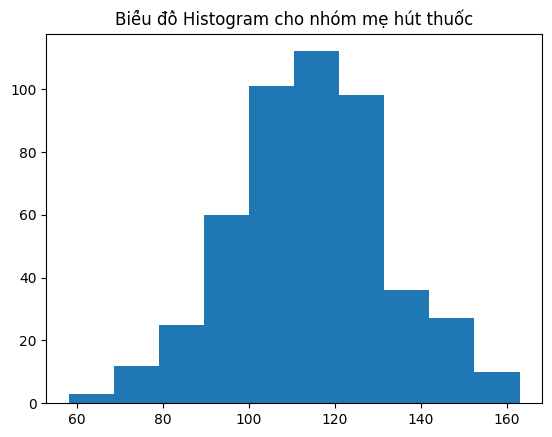

In [399]:
# Histogram cho nhóm mẹ hút thuốc
plt.hist(group1)
plt.title('Biểu đồ Histogram cho nhóm mẹ hút thuốc')

Text(0, 0.5, 'Cân nặng')

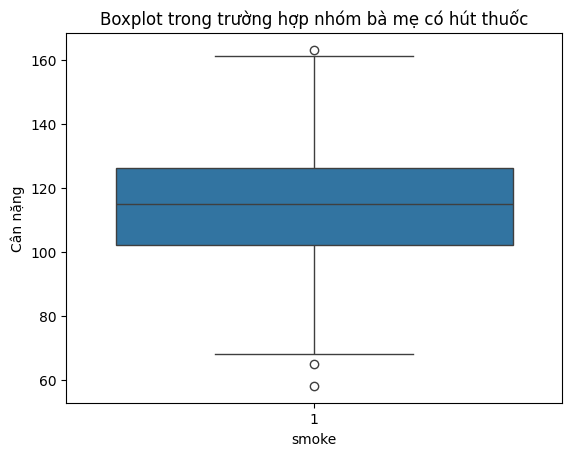

In [400]:
# Lọc dữ liệu chỉ cho nhóm mẹ hút thuốc
group_smoke = df[df['smoke'] == 1]

# Vẽ Boxplot cho nhóm mẹ hút thuốc
sns.boxplot(x='smoke',y='bwt', data=group_smoke)
plt.title('Boxplot trong trường hợp nhóm bà mẹ có hút thuốc')
plt.ylabel('Cân nặng')

*-  Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ [102,126]*  
*-  Giá trị ngoại lệ: có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) nhưng không nhiều*

Text(0.5, 1.0, 'QQ-plot trong trường hợp bà mẹ có hút thuốc')

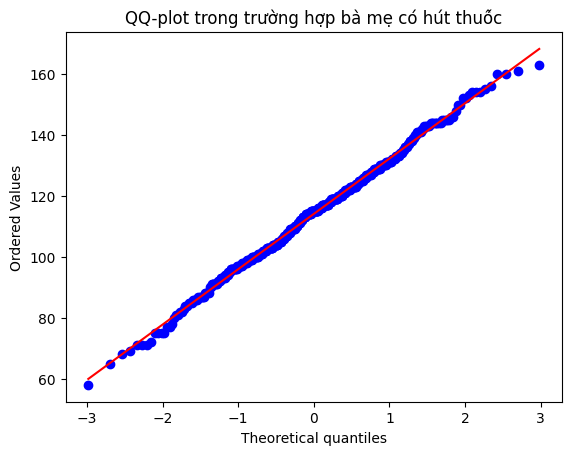

In [401]:
# QQ-plot cho nhóm mẹ hút thuốc
stats.probplot(group1, dist="norm", plot=plt)
plt.title('QQ-plot trong trường hợp bà mẹ có hút thuốc')

2. Dữ liệu cân nặng của trẻ trong trường hợp bà không mẹ hút thuốc

Text(0.5, 1.0, 'Biểu đồ Histogram cho nhóm mẹ không hút thuốc')

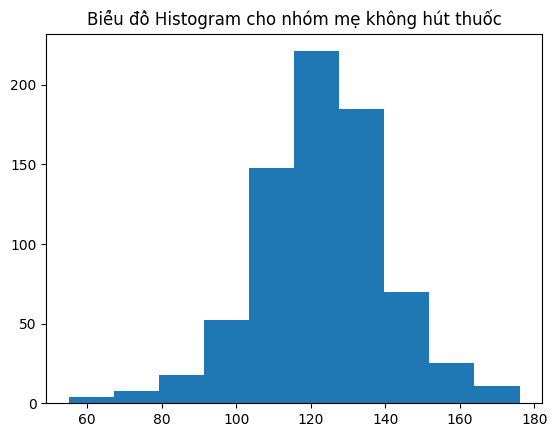

In [402]:
# Histogram cho nhóm mẹ không hút thuốc
plt.hist(group2)
plt.title('Biểu đồ Histogram cho nhóm mẹ không hút thuốc')

Text(0, 0.5, 'Cân nặng')

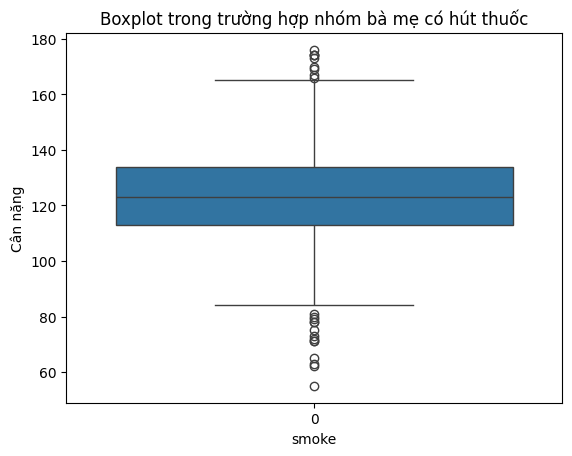

In [403]:
# Lọc dữ liệu chỉ cho nhóm mẹ hút thuốc
group_nonsmoke = df[df['smoke'] == 0]

# Vẽ Boxplot cho nhóm mẹ hút thuốc
sns.boxplot(x= 'smoke', y='bwt', data=group_nonsmoke)
plt.title('Boxplot trong trường hợp nhóm bà mẹ có hút thuốc')
plt.ylabel('Cân nặng')

Text(0.5, 1.0, 'QQ-plot trong trường hợp bà mẹ không hút thuốc')

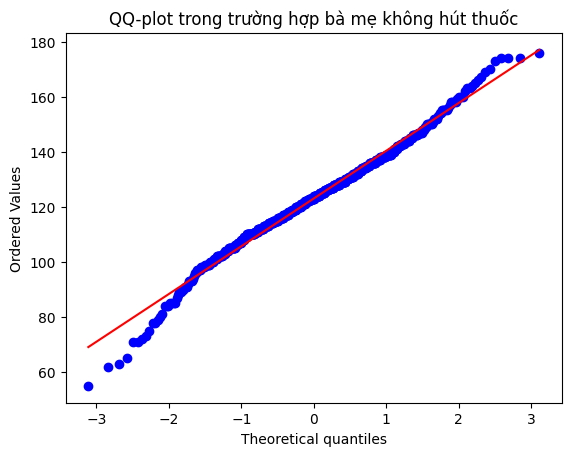

In [404]:
# QQ-plot cho nhóm mẹ không hút thuốc
stats.probplot(group2, dist="norm", plot=plt)
plt.title('QQ-plot trong trường hợp bà mẹ không hút thuốc')

3. So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

*    **Biểu đồ Histogram**

Text(0.5, 0, 'Cân nặng')

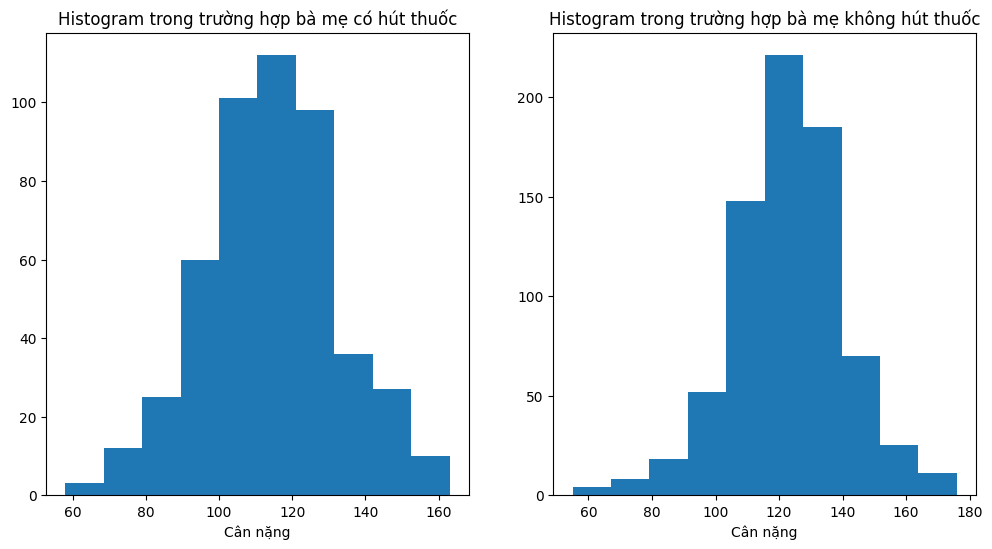

In [405]:
# Tạo figure và các subplot
plt.figure(figsize=(12, 6))

# Biểu đồ histogram cho nhóm mẹ hút thuốc
plt.subplot(1, 2, 1)
plt.hist(group1)
plt.title('Histogram trong trường hợp bà mẹ có hút thuốc')
plt.xlabel('Cân nặng')

# Biểu đồ histogram cho nhóm mẹ không hút thuốc
plt.subplot(1, 2, 2)
plt.hist(group2)
plt.title('Histogram trong trường hợp bà mẹ không hút thuốc')
plt.xlabel('Cân nặng')


*Cân nặng của trẻ trẻ trong trường hợp bà mẹ không hút thuốc cao hơn so với trường hợp bà mẹ có hút thuốc*  
*Tính biến thiên của 2 tập dữ liệu: tương tự nhau*  
*Tính đối xứng của 2 tập dữ liệu: tương tự nhau*  
*Giá trị ngoại lệ: cả 2 đều không có giá trị ngoại lệ đáng chú ý*

*   **Biểu đồ Boxplot**

<AxesSubplot:xlabel='smoke', ylabel='bwt'>

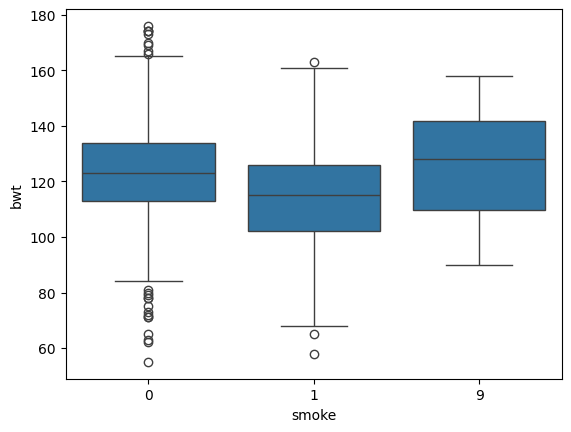

In [406]:
# Boxplot trường hợp nhóm mẹ hút thuốc không hút thuốc và không biết
sns.boxplot(x='smoke', y='bwt', data=df)

***Khác biệt về vị trí:** giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115). (Trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút thuốc và không hút thuốc).*  
  
  
***Giá trị ngoại lệ:** cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn*

Text(0, 0.5, '')

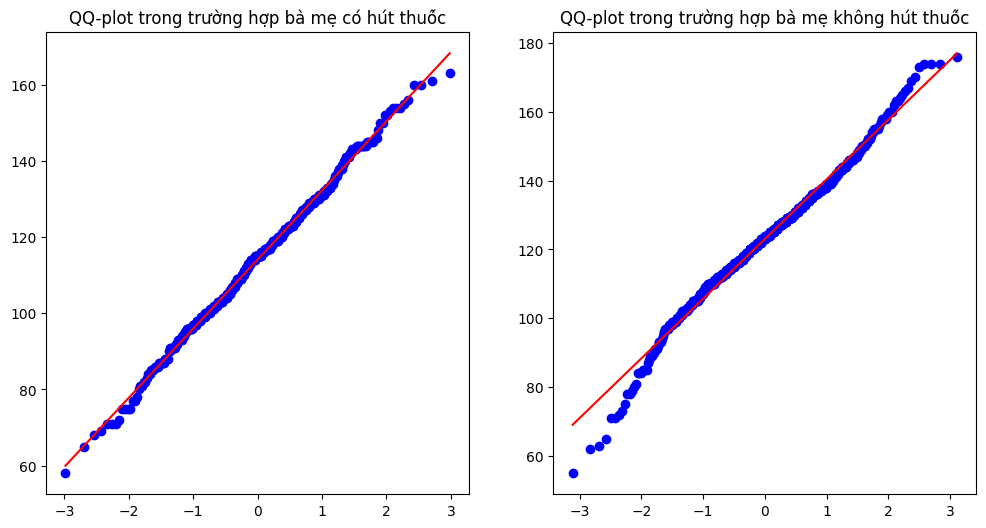

In [407]:
# Vẽ QQ-plot cho cả hai nhóm mẹ hút thuốc và không hút thuốc
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# QQ-plot cho nhóm mẹ hút thuốc
stats.probplot(group1, dist="norm", plot=axs[0])
axs[0].set_title('QQ-plot trong trường hợp bà mẹ có hút thuốc')
axs[0].set_xlabel('')
axs[0].set_ylabel('')


# QQ-plot cho nhóm mẹ không hút thuốc
stats.probplot(group2, dist="norm", plot=axs[1])
axs[1].set_title('QQ-plot trong trường hợp bà mẹ không hút thuốc')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

*QQ-plot có dạng đường thẳng, suy ra dữ liệu của 2 trường hợp có phân bố tương tự nhau.*